In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
qc = QuantumCircuit(3,3)

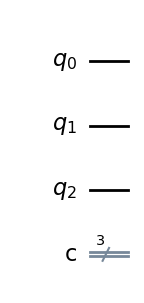

In [3]:
qc.draw('mpl')

## Step 1: Entangle


In [4]:
# Create an entangled state between qubit 1 (Alice's qubit) and qubit 2 (Bob's qubit)
qc.h(1) # Create superposition on qubit 1
qc.cx(1, 2) # Entangle qubit 1 with qubit 2

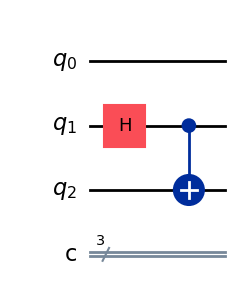

In [5]:
qc.draw('mpl')

In [6]:
# Prepare Alice's qubit (qubit 0) in an initial state |ψ⟩, for example, |+⟩ = (|0⟩ + |1⟩)/sqrt(2)
qc.h(0) # Create superposition on qubit 0


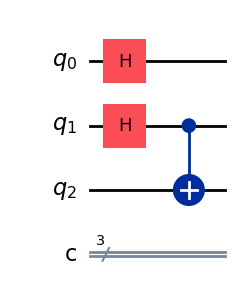

In [7]:
qc.draw('mpl')

## Step 2: Encode


In [8]:
# Perform a Bell measurement on qubit 0 and qubit 1 (Alice's qubits)
qc.cx(0, 1)
qc.h(0)

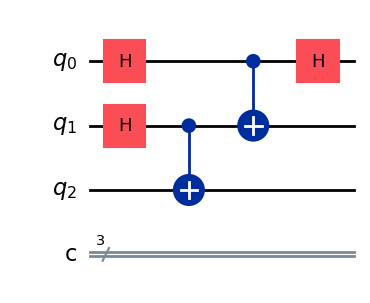

In [9]:
qc.draw('mpl')

## Step 3: Communicate


In [10]:
# Measure qubits 0 and 1 and store the results in classical bits 0 and 1
qc.measure([0, 1], [0, 1])


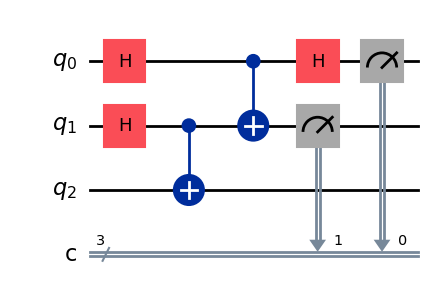

In [11]:
qc.draw('mpl')

## Step 4: Decode


In [12]:
# Use the classical bits to apply the necessary corrections to qubit 2 (Bob's qubit)
# If the measurement results are 01 or 10, apply CNOT gate
# If the measurement results are 11, apply Phase flip
qc.cx(1, 2)
qc.cz(0, 2)

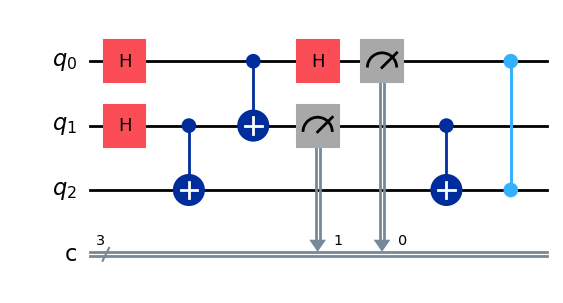

In [13]:
qc.draw('mpl')

In [14]:
# Measure Bob's qubit to verify the teleportation
qc.measure(2, 2)


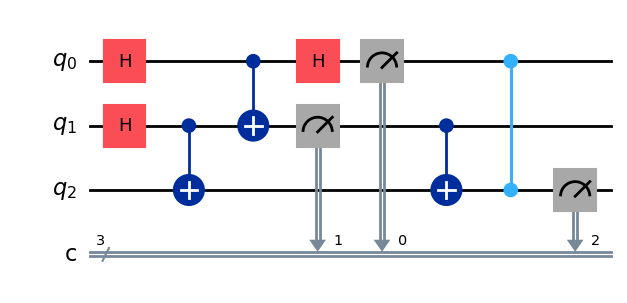

In [15]:
qc.draw('mpl')

### Execute the circuit

In [16]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)


Total count for each state are:
 {'001': 111, '110': 140, '100': 137, '011': 108, '111': 125, '000': 132, '010': 138, '101': 133}


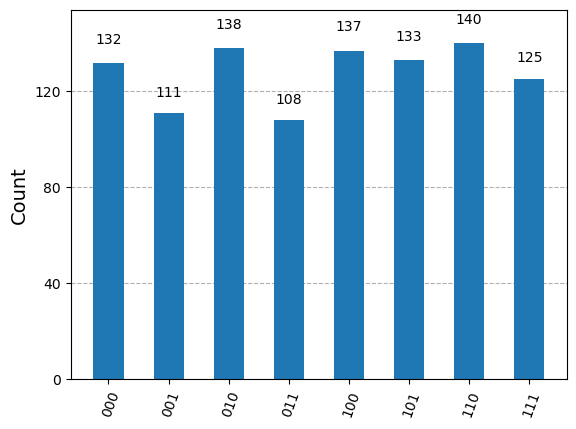

In [17]:
# Run the simulation
job = simulator.run(compiled_circuit)
result = job.result()

# Get and print the results
counts = result.get_counts(compiled_circuit)
print("\nTotal count for each state are:\n", counts)
plot_histogram(counts)

Understanding the Counts

Each entry in the dictionary you provided represents a possible measurement outcome and the number of times that outcome occurred. For example:

	•	'110': 137 means that in 137 out of 1024 runs, qubit 2 was measured as 1, qubit 1 as 1, and qubit 0 as 0.

Analyzing Qubit 2 (Bob’s qubit)

Since qubit 2 is the qubit we are interested in (it should now hold the teleported state of qubit 0), we need to analyze how often qubit 2 was measured as 0 or 1.

Counts for qubit 2 = 0:

These are the outcomes where the first bit (qubit 2) is 0:

	•	000: Qubit 2 = 0, Qubit 1 = 0, Qubit 0 = 0 (116 times)
	•	010: Qubit 2 = 0, Qubit 1 = 1, Qubit 0 = 0 (125 times)
	•	001: Qubit 2 = 0, Qubit 1 = 0, Qubit 0 = 1 (130 times)
	•	011: Qubit 2 = 0, Qubit 1 = 1, Qubit 0 = 1 (114 times)

Adding these counts gives us the total number of times qubit 2 was measured as 0:

	•	116 (000) + 125 (010) + 130 (001) + 114 (011) = 485

Counts for qubit 2 = 1:

These are the outcomes where the first bit (qubit 2) is 1:

	•	100: Qubit 2 = 1, Qubit 1 = 0, Qubit 0 = 0 (133 times)
	•	110: Qubit 2 = 1, Qubit 1 = 1, Qubit 0 = 0 (137 times)
	•	101: Qubit 2 = 1, Qubit 1 = 0, Qubit 0 = 1 (127 times)
	•	111: Qubit 2 = 1, Qubit 1 = 1, Qubit 0 = 1 (142 times)

Adding these counts gives us the total number of times qubit 2 was measured as 1:

	•	133 (100) + 137 (110) + 127 (101) + 142 (111) = 539

Conclusion

By comparing these two sums, we can determine whether the state of qubit 2 is consistent with the initial state of qubit 0 (which was prepared in a superposition state |+⟩ = (|0⟩ + |1⟩)/√2). For a |+⟩ state, we expect the measurements in the Z-basis to be approximately equal for 0 and 1.

	•	Qubit 2 = 0: 485 times
	•	Qubit 2 = 1: 539 times

These counts are relatively close, suggesting that qubit 2 is in a superposition state as expected if the teleportation was successful. This indicates that the quantum state originally prepared on qubit 0 has been successfully teleported to qubit 2.

In [18]:
# Separate counts for each qubit
qubit_0_counts = {'0': 0, '1': 0}
qubit_1_counts = {'0': 0, '1': 0}
qubit_2_counts = {'0': 0, '1': 0}

In [19]:
# Sum counts based on the measurement outcomes of each qubit
for state, count in counts.items():
    qubit_2_counts[state[0]] += count
    qubit_1_counts[state[1]] += count
    qubit_0_counts[state[2]] += count


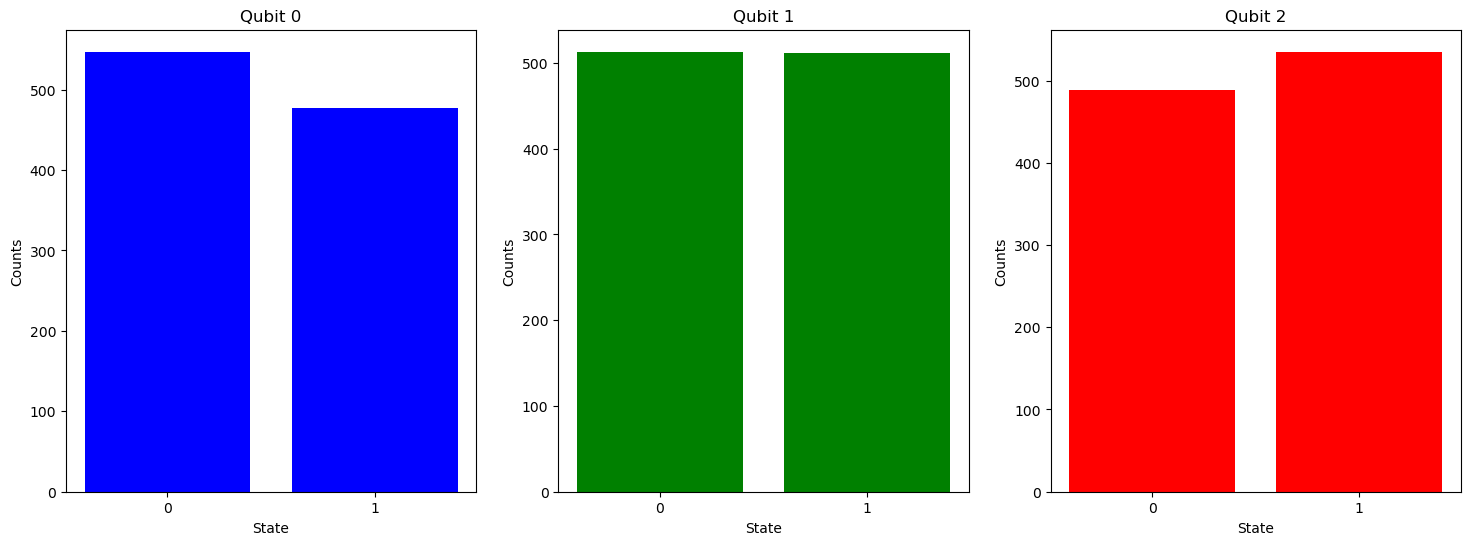

In [20]:
# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].bar(qubit_0_counts.keys(), qubit_0_counts.values(), color='blue')
ax[0].set_title('Qubit 0')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Counts')

ax[1].bar(qubit_1_counts.keys(), qubit_1_counts.values(), color='green')
ax[1].set_title('Qubit 1')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Counts')

ax[2].bar(qubit_2_counts.keys(), qubit_2_counts.values(), color='red')
ax[2].set_title('Qubit 2')
ax[2].set_xlabel('State')
ax[2].set_ylabel('Counts')

plt.show()